In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import tempfile

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_sin_movilidad = pd.read_csv("/content/drive/MyDrive/TFM/datos/df_sin_movilidad.csv", sep = ";")

In [ ]:
df_sin_movilidad.head()

,fecha,indicativo,prec,tmax,tmed,tmin,velmedia,racha,sol,presMax,...,alto_riesgo,peligro,vulner,ocurrencia,municipio,cod_municipio,laborable,dayofyear,weekend,mes
0,2015-01-01,0002I,0.0,12.4,12.1,11.9,0.3,8.3,457.0,1020.7,...,Sí,Molt Alt,Molt Alta,0,Vandellos l’Hospitalet de l’Infant,43162,3,1,0,1
1,2015-01-01,WE,0.0,11.3,11.1,10.7,5.3,7.8,449.0,1027.2,...,Sí,Alt,Molt Alta,0,Vilanova del Vallès,8946,3,1,0,1
2,2015-01-01,WG,0.0,8.5,8.1,7.6,0.8,2.3,428.0,1020.0,...,Sí,Molt Alt,Moderada,0,Algerri,25528,3,1,0,1
3,2015-01-01,WI,0.0,7.8,7.6,7.4,2.1,4.1,468.0,1031.5,...,Sí,Molt Alt,Baixa,0,Maials,25761,3,1,0,1
4,2015-01-01,WJ,0.0,12.3,11.7,11.3,1.0,2.4,449.0,1000.2,...,Sí,Molt Alt,Moderada,0,El Masroig,43675,3,1,0,1


In [ ]:
df_sin_movilidad = df_sin_movilidad.drop(['indicativo', 'municipio', 'cod_municipio'], axis=1)


In [ ]:
df_sin_movilidad = df_sin_movilidad.sort_values(by='fecha')
df_sin_movilidad.set_index('fecha', inplace=True)

In [ ]:
df_sin_movilidad.shape

(488345, 20)

#Division de los datos (Desbalanceado)

In [ ]:
df_train = df_sin_movilidad.loc['2015-01-01':'2020-12-31'] # 6 años de train
df_test = df_sin_movilidad.loc['2021-01-01':'2022-12-31']  # 1 año y medio de test

In [ ]:
X_train = df_train.drop('ocurrencia', axis=1)
y_train = df_train['ocurrencia']

X_test = df_test.drop('ocurrencia', axis=1)
y_test = df_test['ocurrencia']

In [ ]:
df_sin_movilidad.shape, df_train.shape,  X_train.shape, y_train.shape, df_test.shape, X_test.shape, y_test.shape

((488345, 20),
 (413052, 20),
 (413052, 19),
 (413052,),
 (75293, 20),
 (75293, 19),
 (75293,))

In [ ]:
# normalizacion de los datos numericos
from sklearn.preprocessing import StandardScaler
numericalCols_train = df_train[["prec","tmed","velmedia","sol","presMax","rhum", "altitud", "porcentaje_pendiente_total"]]
numericalCols_test = df_test[["prec","tmed","velmedia","sol","presMax","rhum", "altitud", "porcentaje_pendiente_total"]]

scaler = StandardScaler()
scaler.fit(numericalCols_train)

numericalCols_train_scaled = scaler.transform(numericalCols_train)
numericalCols_test_scaled = scaler.transform(numericalCols_test)

numericalCols_train_scaled.shape , numericalCols_test_scaled.shape

((413052, 8), (75293, 8))

In [ ]:
# normalizacion de los datos categoricos , sin la ocurrencia
from sklearn.preprocessing import OneHotEncoder
categoricalCols_train = df_train.iloc[:,12:15]   #alto_riesgo	peligro	vulner
categoricalCols_train = OneHotEncoder().fit_transform(categoricalCols_train).toarray()


# normalizacion de los datos categoricos , sin la ocurrencia
from sklearn.preprocessing import OneHotEncoder
categoricalCols_test = df_test.iloc[:,12:15]   #alto_riesgo	peligro	 y vulner
categoricalCols_test = OneHotEncoder().fit_transform(categoricalCols_test).toarray()

categoricalCols_train.shape, categoricalCols_test.shape

((413052, 12), (75293, 12))

In [ ]:
Other_var_train = df_train[['laborable', 	'dayofyear', 	'weekend', 	'mes']]
Other_var_test = df_test[['laborable', 	'dayofyear', 	'weekend', 	'mes']]  #alto_riesgo	peligro	 y vulner

In [ ]:
df_train_scaled = np.concatenate((numericalCols_train_scaled , categoricalCols_train, Other_var_train), axis=1)
df_test_scaled = np.concatenate((numericalCols_test_scaled , categoricalCols_test, Other_var_test), axis=1)

In [ ]:
X_test = df_test_scaled
X_train = df_train_scaled

In [ ]:
model = XGBClassifier(n_estimators= 500, 
                      learning_rate=0.0001,
                      objective= 'binary:logistic',
                      random_state=0,
                      n_jobs=-1, 
                      max_depth=20, verbose=True)

In [ ]:
model.fit(X_train, y_train)

XGBClassifier(learning_rate=0.0001, max_depth=20, n_estimators=500, n_jobs=-1,
              verbose=True)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.6361386138613861

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Conjunto de datos de validación
  Exactitud:     0.63614
  Precisión:     0.63652
  Exhaustividad: 0.63599
              precision    recall  f1-score   support

           0       0.64      0.61      0.62       603
           1       0.63      0.67      0.65       609

    accuracy                           0.64      1212
   macro avg       0.64      0.64      0.64      1212
weighted avg       0.64      0.64      0.64      1212



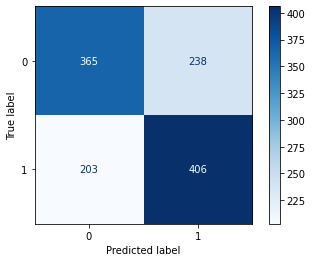

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model, X_test, y_test, cmap = plt.cm.Blues)

print(f'Conjunto de datos de validación')
print(f'  Exactitud:     { accuracy_score(y_test, y_pred) :0.5f}')
print(f'  Precisión:     { precision_score(y_test, y_pred, average = "macro") :0.5f}')
print(f'  Exhaustividad: { recall_score(y_test, y_pred, average = "macro") :0.5f}')

print(classification_report(y_test, y_pred))

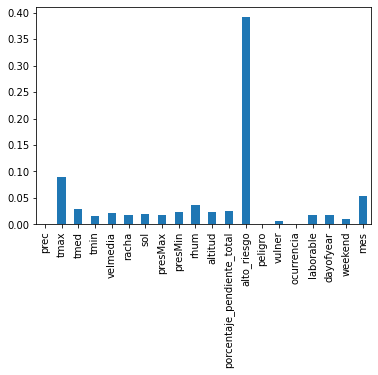

In [ ]:
importances = model.feature_importances_
importances_dict_final_rus = dict(zip(df_train.columns, importances))
pd.Series(importances_dict_final_rus).plot(kind='bar')

#Division de los datos (Manual- UnderSampler)

In [ ]:
df_sin_mov = df_sin_movilidad.loc['2015-01-01':'2022-12-31']

In [ ]:
df_sin_mov.groupby("ocurrencia").count()

,prec,tmax,tmed,tmin,velmedia,racha,sol,presMax,presMin,rhum,altitud,porcentaje_pendiente_total,alto_riesgo,peligro,vulner,laborable,dayofyear,weekend,mes
ocurrencia,,,,,,,,,,,,,,,,,,,
0,485316,485316,485316,485316,485316,485316,485316,485316,485316,485316,485316,485316,485316,485316,485316,485316,485316,485316,485316
1,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029


In [ ]:
df_sin_mov.groupby("ocurrencia").count().columns

Index(['prec', 'tmax', 'tmed', 'tmin', 'velmedia', 'racha', 'sol', 'presMax',
       'presMin', 'rhum', 'altitud', 'porcentaje_pendiente_total',
       'alto_riesgo', 'peligro', 'vulner', 'laborable', 'dayofyear', 'weekend',
       'mes'],
      dtype='object')

In [ ]:
df_ocurrencia_0 = df_sin_mov[df_sin_mov["ocurrencia"]==0].sample(3029)

In [ ]:
df_ocurrencia_1 = df_sin_mov[df_sin_mov["ocurrencia"]==1]

In [ ]:
df_all_rus =  pd.concat([df_ocurrencia_0, df_ocurrencia_1])
df_all_rus.shape

(6058, 20)

In [ ]:
X = df_all_rus.drop( ['ocurrencia'], axis=1)
y = df_all_rus['ocurrencia']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
df_all_rus.shape, X.shape,  y.shape

((6058, 20), (6058, 19), (6058,))

In [ ]:
# normalizacion de los datos numericos
numericalCols_train = X_train[["prec","tmed","tmax", "tmin","velmedia", "racha","sol","presMax","presMin","rhum", "altitud", "porcentaje_pendiente_total"]]
numericalCols_test = X_test[["prec","tmed","tmax", "tmin","velmedia", "racha","sol","presMax","presMin","rhum", "altitud", "porcentaje_pendiente_total"]]

scaler = StandardScaler()
scaler.fit(numericalCols_train)

numericalCols_train_scaled = scaler.transform(numericalCols_train)
numericalCols_test_scaled = scaler.transform(numericalCols_test)

numericalCols_train_scaled.shape , numericalCols_test_scaled.shape

((4846, 12), (1212, 12))

In [ ]:
# normalizacion de los datos categoricos , sin la ocurrencia
categoricalCols_train = X_train[['alto_riesgo',	'peligro',	'vulner']]  #alto_riesgo	peligro	vulner
categoricalCols_train = OneHotEncoder().fit_transform(categoricalCols_train).toarray()


# normalizacion de los datos categoricos , sin la ocurrencia
categoricalCols_test = X_test[['alto_riesgo',	'peligro',	'vulner',]]   #alto_riesgo	peligro	 y vulner
categoricalCols_test = OneHotEncoder().fit_transform(categoricalCols_test).toarray()

categoricalCols_train.shape, categoricalCols_test.shape

((4846, 12), (1212, 12))

In [ ]:
Other_var_train = X_train[['laborable', 	'dayofyear', 	'weekend', 	'mes']]
Other_var_test = X_test[['laborable', 	'dayofyear', 	'weekend', 	'mes']]  #alto_riesgo	peligro	 y vulner

In [ ]:
df_train_scaled = np.concatenate((numericalCols_train_scaled , categoricalCols_train, Other_var_train), axis=1)
df_test_scaled = np.concatenate((numericalCols_test_scaled , categoricalCols_test, Other_var_test), axis=1)

In [ ]:
X_test = df_test_scaled
X_train = df_train_scaled

In [ ]:
model_xgb = XGBClassifier(n_estimators= 500, 
                      learning_rate=0.0001,
                      objective= 'binary:logistic',
                      random_state=0,
                      n_jobs=-1, 
                      max_depth=5, verbose=3)

In [ ]:
model_xgb.fit(X_train, y_train)

XGBClassifier(learning_rate=0.0001, max_depth=5, n_estimators=500, n_jobs=-1,
              verbose=3)

In [ ]:
y_pred = model_xgb.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.6765676567656765

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Conjunto de datos de validación
  Exactitud:     0.67657
  Precisión:     0.68139
  Exhaustividad: 0.67615
              precision    recall  f1-score   support

           0       0.71      0.59      0.65       603
           1       0.65      0.76      0.70       609

    accuracy                           0.68      1212
   macro avg       0.68      0.68      0.67      1212
weighted avg       0.68      0.68      0.67      1212



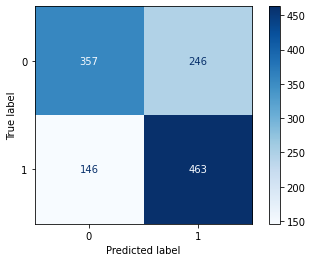

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model_xgb, X_test, y_test, cmap = plt.cm.Blues)

print(f'Conjunto de datos de validación')
print(f'  Exactitud:     { accuracy_score(y_test, y_pred) :0.5f}')
print(f'  Precisión:     { precision_score(y_test, y_pred, average = "macro") :0.5f}')
print(f'  Exhaustividad: { recall_score(y_test, y_pred, average = "macro") :0.5f}')

print(classification_report(y_test, y_pred))

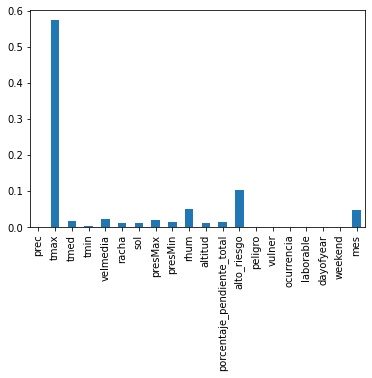

In [ ]:
importances = model_xgb.feature_importances_
importances_dict_final_rus = dict(zip(df_sin_mov.columns, importances))
pd.Series(importances_dict_final_rus).plot(kind='bar')

#Grid Model Xgboost 

In [ ]:
param_grid = {
    'n_estimators': [1500],
    'max_depth' : [5, 10],
    'min_samples_split' : [5, 10],
    'min_samples_leaf' : [5, 10],
    'class_weight':[{0: 1, 1: 1}, {0: 1, 1: 50}]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 50}],
                         'max_depth': [5, 10], 'min_samples_leaf': [5, 10],
                         'min_samples_split': [5, 10], 'n_estimators': [1500]},
             verbose=True)

In [ ]:
final_model = grid_search.best_estimator_
final_model

XGBClassifier(class_weight={0: 1, 1: 1}, max_depth=10, min_samples_leaf=5,
              min_samples_split=5, n_estimators=1500)

In [ ]:
y_pred = final_model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Conjunto de datos de validación
  Exactitud:     0.68069
  Precisión:     0.68081
  Exhaustividad: 0.68062
              precision    recall  f1-score   support

           0       0.68      0.67      0.67       603
           1       0.68      0.70      0.69       609

    accuracy                           0.68      1212
   macro avg       0.68      0.68      0.68      1212
weighted avg       0.68      0.68      0.68      1212



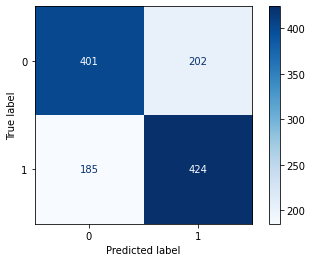

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(final_model, X_test, y_test, cmap = plt.cm.Blues)

print(f'Conjunto de datos de validación')
print(f'  Exactitud:     { accuracy_score(y_test, y_pred) :0.5f}')
print(f'  Precisión:     { precision_score(y_test, y_pred, average = "macro") :0.5f}')
print(f'  Exhaustividad: { recall_score(y_test, y_pred, average = "macro") :0.5f}')

print(classification_report(y_test, y_pred))

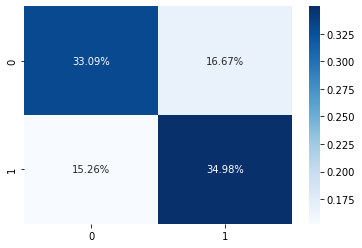

In [ ]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

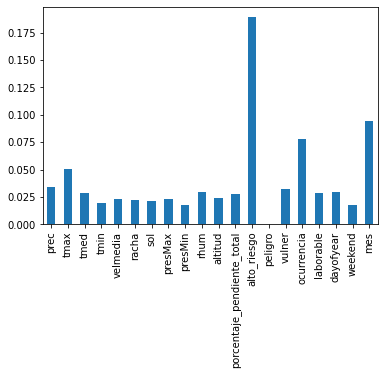

In [ ]:
importances_final = final_model.feature_importances_
importances_dict_final = dict(zip(df_sin_mov.columns, importances_final))
pd.Series(importances_dict_final).plot(kind='bar')

#Balanceo de clases con SMOTE


In [ ]:
from imblearn.over_sampling import SMOTE 
X_smote , y_smote = SMOTE().fit_resample(X_train, y_train)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print('After OverSampling, the shape of train_X: {}'.format(X_smote.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_smote.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_smote == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_smote == 0)))


Before OverSampling, counts of label '1': 2420
Before OverSampling, counts of label '0': 2426 

After OverSampling, the shape of train_X: (4852, 28)
After OverSampling, the shape of train_y: (4852,) 

After OverSampling, counts of label '1': 2426
After OverSampling, counts of label '0': 2426


In [ ]:
model_xgb.fit(X_smote, y_smote)

XGBClassifier(learning_rate=0.0001, max_depth=5, n_estimators=500, n_jobs=-1,
              verbose=3)

In [ ]:
y_pred = model_xgb.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Conjunto de datos de validación
  Exactitud:     0.67657
  Precisión:     0.68139
  Exhaustividad: 0.67615
              precision    recall  f1-score   support

           0       0.71      0.59      0.65       603
           1       0.65      0.76      0.70       609

    accuracy                           0.68      1212
   macro avg       0.68      0.68      0.67      1212
weighted avg       0.68      0.68      0.67      1212



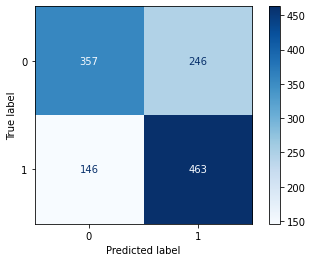

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model_xgb, X_test, y_test, cmap = plt.cm.Blues)

print(f'Conjunto de datos de validación')
print(f'  Exactitud:     { accuracy_score(y_test, y_pred) :0.5f}')
print(f'  Precisión:     { precision_score(y_test, y_pred, average = "macro") :0.5f}')
print(f'  Exhaustividad: { recall_score(y_test, y_pred, average = "macro") :0.5f}')

print(classification_report(y_test, y_pred))

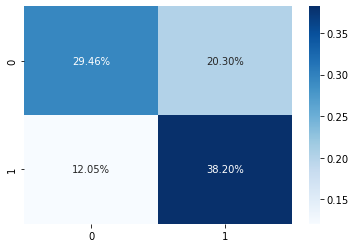

In [ ]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

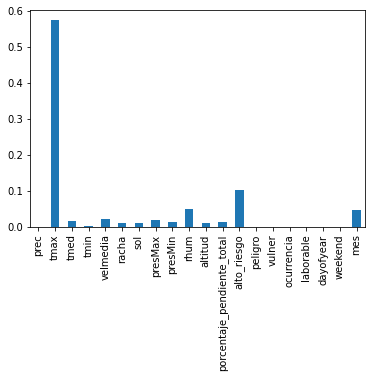

In [ ]:
importances_smote = model_xgb.feature_importances_
importances_dict_smote = dict(zip(df_sin_mov.columns, importances_smote))
pd.Series(importances_dict_smote).plot(kind='bar')

#Grid Smote

In [ ]:
param_grid = {
    'n_estimators': [1500],
    'max_depth' : [5, 10],
    'min_samples_split' : [5, 10],
    'min_samples_leaf' : [5, 10],
    'class_weight':[{0: 1, 1: 1}, {0: 1, 1: 50}]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search_smote = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, cv=5, verbose=True)
grid_search_smote.fit(X_smote, y_smote)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 50}],
                         'max_depth': [5, 10], 'min_samples_leaf': [5, 10],
                         'min_samples_split': [5, 10], 'n_estimators': [1500]},
             verbose=True)

In [ ]:
final_model_smote = grid_search_smote.best_estimator_
final_model_smote

XGBClassifier(class_weight={0: 1, 1: 1}, max_depth=10, min_samples_leaf=5,
              min_samples_split=5, n_estimators=1500)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Conjunto de datos de validación
  Exactitud:     0.67657
  Precisión:     0.68139
  Exhaustividad: 0.67615
              precision    recall  f1-score   support

           0       0.71      0.59      0.65       603
           1       0.65      0.76      0.70       609

    accuracy                           0.68      1212
   macro avg       0.68      0.68      0.67      1212
weighted avg       0.68      0.68      0.67      1212



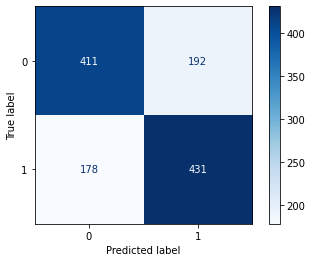

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(final_model_smote, X_test, y_test, cmap = plt.cm.Blues)

print(f'Conjunto de datos de validación')
print(f'  Exactitud:     { accuracy_score(y_test, y_pred) :0.5f}')
print(f'  Precisión:     { precision_score(y_test, y_pred, average = "macro") :0.5f}')
print(f'  Exhaustividad: { recall_score(y_test, y_pred, average = "macro") :0.5f}')

print(classification_report(y_test, y_pred))

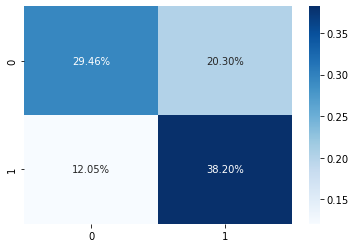

In [ ]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

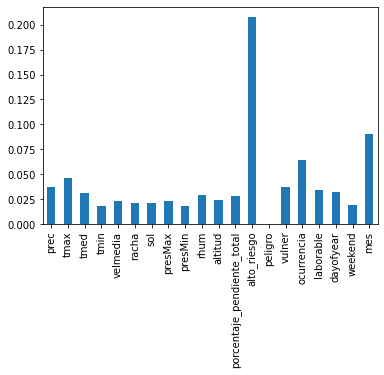

In [ ]:
importances_smote_final = final_model_smote.feature_importances_
importances_dict_final_smote = dict(zip(df_sin_mov.columns, importances_smote_final))
pd.Series(importances_dict_final_smote).plot(kind='bar')

#Balanceo de clases RandomUnderSampler


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

X_rus , y_rus = RandomUnderSampler().fit_resample(X_train, y_train)


print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print('After OverSampling, the shape of train_X: {}'.format(X_rus.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_rus.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_rus == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_rus == 0)))

Before OverSampling, counts of label '1': 2420
Before OverSampling, counts of label '0': 2426 

After OverSampling, the shape of train_X: (4840, 28)
After OverSampling, the shape of train_y: (4840,) 

After OverSampling, counts of label '1': 2420
After OverSampling, counts of label '0': 2420


In [ ]:
model_rus = XGBClassifier(n_estimators= 1500, 
                      learning_rate=0.0001,
                      objective= 'binary:logistic',
                      random_state=0,
                      n_jobs=-1, 
                      max_depth=20, verbose=3)

In [ ]:
model_rus.fit(X_rus, y_rus)

XGBClassifier(learning_rate=0.0001, max_depth=20, n_estimators=1500, n_jobs=-1,
              verbose=3)

In [ ]:
y_pred = model_rus.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Conjunto de datos de validación
  Exactitud:     0.63861
  Precisión:     0.63885
  Exhaustividad: 0.63849
              precision    recall  f1-score   support

           0       0.64      0.61      0.63       603
           1       0.63      0.66      0.65       609

    accuracy                           0.64      1212
   macro avg       0.64      0.64      0.64      1212
weighted avg       0.64      0.64      0.64      1212



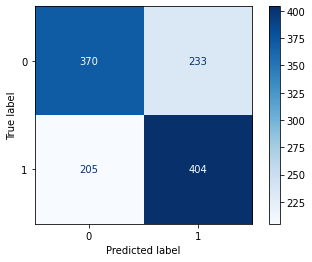

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model_rus, X_test, y_test, cmap = plt.cm.Blues)

print(f'Conjunto de datos de validación')
print(f'  Exactitud:     { accuracy_score(y_test, y_pred) :0.5f}')
print(f'  Precisión:     { precision_score(y_test, y_pred, average = "macro") :0.5f}')
print(f'  Exhaustividad: { recall_score(y_test, y_pred, average = "macro") :0.5f}')

print(classification_report(y_test, y_pred))

In [ ]:
y_test.sum(), y_pred.sum(), y_train.sum(), y_rus.sum()

(609, 637, 2420, 2420)

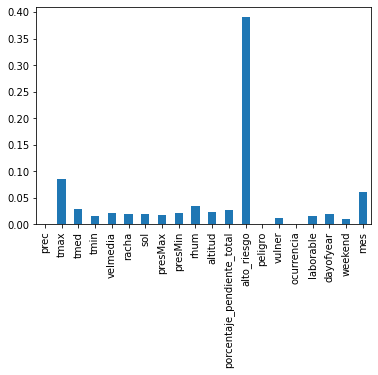

In [ ]:
importances_rus = model_rus.feature_importances_
importances_dict_rus = dict(zip(df_all_rus.columns, importances_rus))
pd.Series(importances_dict_rus).plot(kind='bar')

#Grid RUS

In [ ]:
param_grid = {
    'n_estimators': [1500, 2500],
    'max_depth' : [5, 10, 15],
    'min_samples_split' : [5, 10,15],
    'min_samples_leaf' : [5, 10,15],
    'class_weight':[{0: 1, 1: 1}, {0: 1, 1: 50}]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_rus, y_rus)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 50}],
                         'max_depth': [5, 10, 15],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [1500, 2500]},
             verbose=True)

In [ ]:
final_model_rus = grid_search.best_estimator_
final_model_rus

XGBClassifier(class_weight={0: 1, 1: 1}, max_depth=15, min_samples_leaf=5,
              min_samples_split=5, n_estimators=1500)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Conjunto de datos de validación
  Exactitud:     0.63861
  Precisión:     0.63885
  Exhaustividad: 0.63849
              precision    recall  f1-score   support

           0       0.64      0.61      0.63       603
           1       0.63      0.66      0.65       609

    accuracy                           0.64      1212
   macro avg       0.64      0.64      0.64      1212
weighted avg       0.64      0.64      0.64      1212



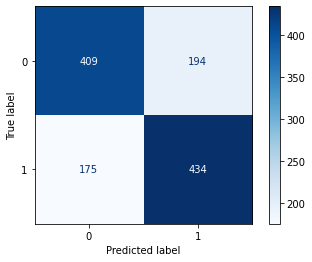

In [ ]:
fcm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(final_model_rus, X_test, y_test, cmap = plt.cm.Blues)

print(f'Conjunto de datos de validación')
print(f'  Exactitud:     { accuracy_score(y_test, y_pred) :0.5f}')
print(f'  Precisión:     { precision_score(y_test, y_pred, average = "macro") :0.5f}')
print(f'  Exhaustividad: { recall_score(y_test, y_pred, average = "macro") :0.5f}')

print(classification_report(y_test, y_pred))

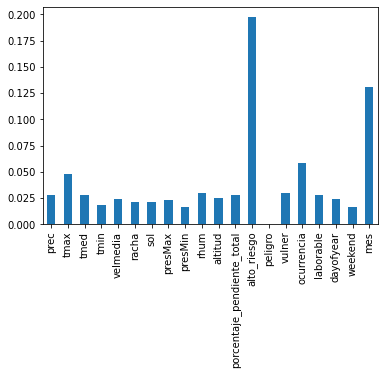

In [ ]:
importances_rus_1 = final_model_rus.feature_importances_
importances_dict_rus_1 = dict(zip(df_sin_mov.columns, importances_rus_1))
pd.Series(importances_dict_rus_1).plot(kind='bar')

#Seleccion de variables importantes


In [142]:
df_sin_movilidad_1 = df_sin_movilidad.drop(['tmax', 'tmin', 'sol', 'racha','velmedia','presMax','rhum','mes', 'altitud', 'weekend','laborable','alto_riesgo', ], axis=1)
df_sin_movilidad_1

,prec,tmed,presMin,porcentaje_pendiente_total,peligro,vulner,ocurrencia,dayofyear
fecha,,,,,,,,
2015-01-01,0.0,12.1,1020.1,2.50,Molt Alt,Molt Alta,0,1
2015-01-01,0.0,11.6,1034.4,2.50,Molt Alt,Moderada,0,1
2015-01-01,0.0,6.2,1021.7,2.50,Exclos,Moderada,0,1
2015-01-01,0.0,4.2,996.5,3.22,Alt,Mitja,0,1
2015-01-01,0.0,10.3,1034.4,5.10,Molt Alt,Moderada,0,1
...,...,...,...,...,...,...,...,...
2022-02-01,0.0,1.9,1019.1,5.10,Moderat,Molt Alta,0,32
2022-02-01,0.0,10.5,1021.8,3.22,Alt,Molt Alta,0,32
2022-02-01,0.0,-6.1,1001.8,0.10,Moderat,Molt Alta,0,32


In [143]:
df_sin_movilidad_1.groupby("ocurrencia").count()

,prec,tmed,presMin,porcentaje_pendiente_total,peligro,vulner,dayofyear
ocurrencia,,,,,,,
0,485316,485316,485316,485316,485316,485316,485316
1,3029,3029,3029,3029,3029,3029,3029


In [144]:
df_sin_movilidad_1.groupby("ocurrencia").count().columns

Index(['prec', 'tmed', 'presMin', 'porcentaje_pendiente_total', 'peligro',
       'vulner', 'dayofyear'],
      dtype='object')

In [145]:
df_ocurrencia_0 = df_sin_movilidad_1[df_sin_movilidad_1["ocurrencia"]==0].sample(3029)

In [146]:
df_ocurrencia_1 = df_sin_movilidad_1[df_sin_movilidad_1["ocurrencia"]==1]

In [147]:
df_sin_movilidad_import =  pd.concat([df_ocurrencia_0, df_ocurrencia_1])
df_sin_movilidad_import.shape
df_sin_movilidad_import

,prec,tmed,presMin,porcentaje_pendiente_total,peligro,vulner,ocurrencia,dayofyear
fecha,,,,,,,,
2021-06-08,0.0,29.3,1012.2,9.00,Exclos,Moderada,0,159
2015-06-11,0.0,27.1,1002.7,1.70,Exclos,Molt Alta,0,162
2015-03-29,0.0,19.0,1019.9,9.00,Exclos,Moderada,0,88
2019-01-10,0.0,4.7,980.5,3.22,Alt,Mitja,0,10
2020-03-21,0.0,15.3,946.1,0.90,Moderat,Moderada,0,81
...,...,...,...,...,...,...,...,...
2021-12-21,0.0,4.2,1019.9,0.10,Moderat,Molt Alta,1,355
2021-12-23,0.0,13.7,1002.5,5.10,Molt Alt,Moderada,1,357
2021-12-29,0.0,17.1,962.6,2.50,Molt Alt,Moderada,1,363


In [148]:
X = df_sin_movilidad_import.drop( ['ocurrencia'], axis=1)
y = df_sin_movilidad_import['ocurrencia']

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [150]:
df_sin_movilidad_import.shape,  X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6058, 8), (4846, 7), (4846,), (1212, 7), (1212,))

In [151]:
# normalizacion de los datos numericos
numericalCols_train = X_train[["prec", "tmed", "porcentaje_pendiente_total", 'presMin']]
numericalCols_test = X_test[["prec", "tmed", "porcentaje_pendiente_total", 'presMin']]

scaler = StandardScaler()
scaler.fit(numericalCols_train)

numericalCols_train_scaled = scaler.transform(numericalCols_train)
numericalCols_test_scaled = scaler.transform(numericalCols_test)

numericalCols_train_scaled.shape , numericalCols_test_scaled.shape

((4846, 4), (1212, 4))

In [152]:
# normalizacion de los datos categoricos , sin la ocurrencia
categoricalCols_train = X_train[[	'vulner']]  #alto_riesgo	peligro	vulner
categoricalCols_train = OneHotEncoder().fit_transform(categoricalCols_train).toarray()


# normalizacion de los datos categoricos , sin la ocurrencia
categoricalCols_test = X_test[['vulner']]   #alto_riesgo	peligro	 y vulner
categoricalCols_test = OneHotEncoder().fit_transform(categoricalCols_test).toarray()

categoricalCols_train.shape, categoricalCols_test.shape

((4846, 5), (1212, 5))

In [153]:
Other_var_train = X_train[['dayofyear']]
Other_var_test = X_test[['dayofyear']]  #alto_riesgo	peligro	 y vulner

In [154]:
df_train_scaled = np.concatenate((numericalCols_train_scaled , categoricalCols_train, Other_var_train), axis=1)
df_test_scaled = np.concatenate((numericalCols_test_scaled , categoricalCols_test, Other_var_test), axis=1)

In [155]:
df_train_scaled.shape, y_train.shape, df_test_scaled.shape, y_test.shape

((4846, 10), (4846,), (1212, 10), (1212,))

In [156]:
X_test = df_test_scaled
X_train = df_train_scaled

In [157]:
model_importances = XGBClassifier(n_estimators= 1500, 
                      learning_rate=0.0001,
                      objective= 'binary:logistic',
                      random_state=0,
                      n_jobs=-1, 
                      max_depth=20, verbose=3)

In [158]:
model_importances.fit(X_train, y_train)

XGBClassifier(learning_rate=0.0001, max_depth=20, n_estimators=1500, n_jobs=-1,
              verbose=3)

In [159]:
y_pred = model_importances.predict(X_test)

In [160]:
accuracy_score(y_test, y_pred)

0.613036303630363

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Conjunto de datos de validación
  Exactitud:     0.61304
  Precisión:     0.61304
  Exhaustividad: 0.61305
              precision    recall  f1-score   support

           0       0.61      0.61      0.61       599
           1       0.62      0.61      0.62       613

    accuracy                           0.61      1212
   macro avg       0.61      0.61      0.61      1212
weighted avg       0.61      0.61      0.61      1212



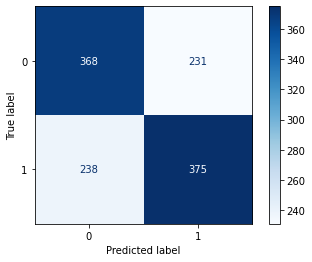

In [161]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model_importances, X_test, y_test, cmap = plt.cm.Blues)

print(f'Conjunto de datos de validación')
print(f'  Exactitud:     { accuracy_score(y_test, y_pred) :0.5f}')
print(f'  Precisión:     { precision_score(y_test, y_pred, average = "macro") :0.5f}')
print(f'  Exhaustividad: { recall_score(y_test, y_pred, average = "macro") :0.5f}')

print(classification_report(y_test, y_pred))

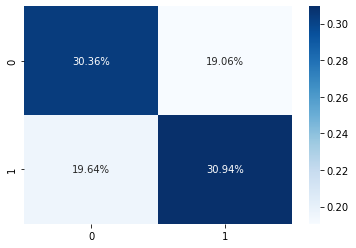

In [162]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

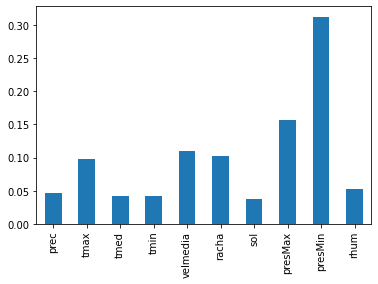

In [163]:
importances_model = model_importances.feature_importances_
importances_dict_import = dict(zip(df_sin_movilidad.columns, importances_model))
pd.Series(importances_dict_import).plot(kind='bar')